<h1>AIM: </h1> <p>In this notebook, we try to predict the score of students based on various independent parameters.   </p>

<h1>Libraries Used</h1>
<ol>
    <li> <b> Data Handling : </b> <p> We have Pandas and a NumPy library to handle and manipulate the data. These frameworks will not only help us in loading the data but also allow us to perform various actions to manipulate and mutate the data according to our requirements </p></li>
    <li> <b> Data Visualisation : </b> <p> We all Know that Data Visualisation is equally important while performing analysis. Visualisation gives us a mental picture, allowing us to for correlations easily. For data visaualisations we will use matplotlib and seaborn libraries </p> </li>
    <li> <b> Model Traing and Evaluation : </b>  <p> For statistical modelling we have used, SkLearn and Pytorch librarie.  </p> </li>
</ol>

In [40]:
# to ignoret he warnings 
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pylab as plt
import seaborn as sns 
import pandas as pd
import pickle
import scipy.stats as stats 
import random
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids

from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, fbeta_score, f1_score, roc_curve, classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import  SVC



# Load Data

<p> Our data is in CSV format. To load the data to our python script, we will use pandas function "read_csv", which takes an argument as the file path! Once the data is loaded, it is loaded as DataFrame type <p>

In [41]:
# Load the data set 
data = pd.read_csv("cs98x-22-dl-task2/train.csv")

# drop the feature 'id' as that does not give any significant information. 
# Thr axis has to be set to 1. this will eliminate the entire id column. 
data.drop( labels= ['id'], axis= 1, inplace= True )

# To have a glance of the data, we use ".head" function, 
# by default it shows first 5 records
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Grade
0,GP,F,16,U,GT3,A,0,3,teacher,services,...,5,4,2,1,0,4,2,8,13,7
1,MS,M,17,U,GT3,T,4,0,other,services,...,4,2,4,2,2,1,28,12,10,12
2,MS,F,17,U,LE3,T,1,0,services,at_home,...,4,4,2,1,2,2,3,11,9,8
3,GP,M,17,R,LE3,T,2,2,health,other,...,2,4,2,2,2,4,2,16,15,9
4,MS,F,14,R,LE3,T,0,1,health,teacher,...,3,3,2,2,1,4,0,9,14,8


<p>
    # Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:<br>
    1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)<br>
    2 sex - student's sex (binary: 'F' - female or 'M' - male)<br>
    3 age - student's age (numeric: from 15 to 22)<br>
    4 address - student's home address type (binary: 'U' - urban or 'R' - rural)<br>
    5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3) <br>
    6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)<br>
    7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)<br>
    8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)<br>
    9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')<br>
    10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')<br>
    11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')<br>
    12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')<br>
    13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)<br>
    14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)<br>
    15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)<br>
    16 schoolsup - extra educational support (binary: yes or no)<br>
    17 famsup - family educational support (binary: yes or no)<br>
    18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)<br>
    19 activities - extra-curricular activities (binary: yes or no)<br>
    20 nursery - attended nursery school (binary: yes or no)<br>
    21 higher - wants to take higher education (binary: yes or no)<br>
    22 internet - Internet access at home (binary: yes or no)<br>
    23 romantic - with a romantic relationship (binary: yes or no)<br>
    24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)<br>
    25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)<br>
    26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)<br>
    27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)<br>
    28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)<br>
    29 health - current health status (numeric: from 1 - very bad to 5 - very good)<br>
    30 absences - number of school absences (numeric: from 0 to 93)<br>

    # these grades are related with the course subject, Math or Portuguese:<br>
    31 G1 - first period grade (numeric: from 0 to 20)<br>
    31 G2 - second period grade (numeric: from 0 to 20)<br>
    32 G3 - final grade (numeric: from 0 to 20, output target)<br>
</p>

# Exploratory Data Analysis

In [42]:
# Size of data set
data.shape

(20064, 33)

<p> From the shape of the data set, we can see that we have 20064 records and the number of dependent and independent features are 33. The target varibale here is "Grade" </p>
<hr>

In [43]:
# see the number of null values 

# iterate through every column name in data farme
for feature_name in data.columns:
    
    # using "isna()" function find the NaNa values, returns  boolian 
    # if True, count it as a NaNa 
    print(f"{feature_name} -> {data[feature_name].isna().sum()}")

school -> 0
sex -> 0
age -> 0
address -> 0
famsize -> 0
Pstatus -> 0
Medu -> 0
Fedu -> 0
Mjob -> 0
Fjob -> 0
reason -> 0
guardian -> 0
traveltime -> 0
studytime -> 0
failures -> 0
schoolsup -> 0
famsup -> 0
paid -> 0
activities -> 0
nursery -> 0
higher -> 0
internet -> 0
romantic -> 0
famrel -> 0
freetime -> 0
goout -> 0
Dalc -> 0
Walc -> 0
health -> 0
absences -> 0
G1 -> 0
G2 -> 0
Grade -> 0


<p>
    We do not have any missing values, as we see from the above output. 
</p>
<hr>

<p>
    We know that only the numerical data can be processed by computers. we can encode the categorical data into numbers in various ways. Method we are implementing here is LabelEncoding. This method creates a key value pair for every categorical values. To implement this we have SkLearns class "LabelEncoder"
</p>

In [44]:
# Label Encode the Values

# for every feature, we store the object of LabelEncoder
la_dct = {}

# iterate over every categorical columns 
for i in data.select_dtypes(np.object_).columns:
    
    # store the name of the feature as the key 
    # the object of the Labelencoder for that calss as a value
    la_dct[i] = LabelEncoder().fit(data[i].values)
    
    # Transform the data to numerical
    data[i] = la_dct[i].transform(data[i].values)
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20064 entries, 0 to 20063
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      20064 non-null  int64
 1   sex         20064 non-null  int64
 2   age         20064 non-null  int64
 3   address     20064 non-null  int64
 4   famsize     20064 non-null  int64
 5   Pstatus     20064 non-null  int64
 6   Medu        20064 non-null  int64
 7   Fedu        20064 non-null  int64
 8   Mjob        20064 non-null  int64
 9   Fjob        20064 non-null  int64
 10  reason      20064 non-null  int64
 11  guardian    20064 non-null  int64
 12  traveltime  20064 non-null  int64
 13  studytime   20064 non-null  int64
 14  failures    20064 non-null  int64
 15  schoolsup   20064 non-null  int64
 16  famsup      20064 non-null  int64
 17  paid        20064 non-null  int64
 18  activities  20064 non-null  int64
 19  nursery     20064 non-null  int64
 20  higher      20064 non-null  

<hr>

<p>
    Let us now visualise the data distribution of categorical values. This is a necessary process as this will allow us to see what features are biased; as a result, we can drop the features that have less variance
</p>

school
0    13620
1     6444
Name: school, dtype: int64


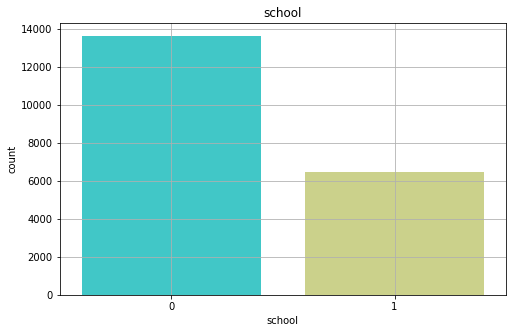

sex
0    11161
1     8903
Name: sex, dtype: int64


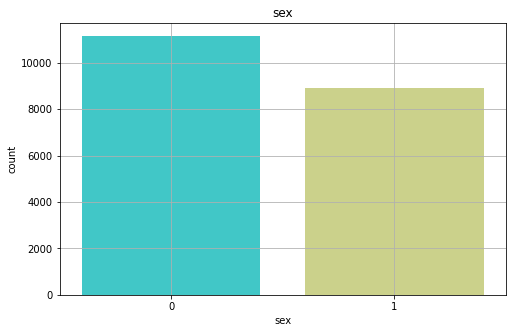

age
16    7056
14    4629
17    3724
15    3712
18     672
19     210
20      56
21       5
Name: age, dtype: int64


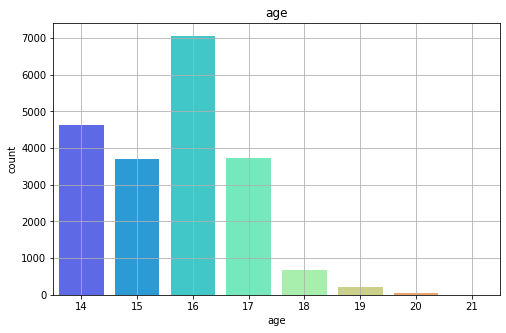

address
1    14907
0     5157
Name: address, dtype: int64


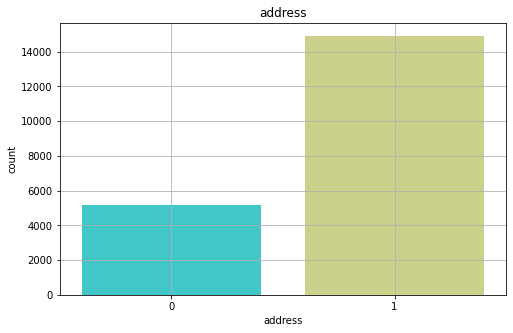

famsize
0    13642
1     6422
Name: famsize, dtype: int64


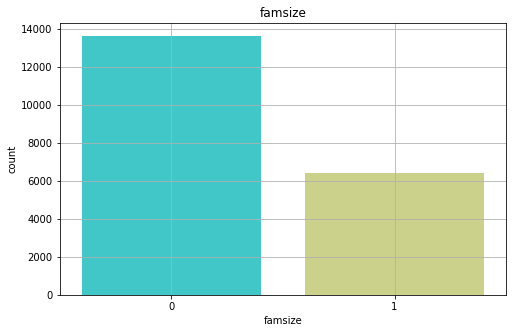

Pstatus
1    16953
0     3111
Name: Pstatus, dtype: int64


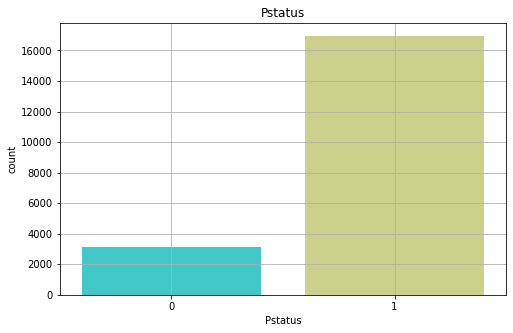

Medu
3    5904
2    5629
4    4727
1    2928
0     876
Name: Medu, dtype: int64


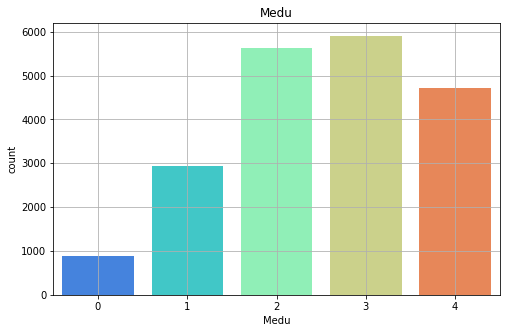

Fedu
1    7617
2    5186
3    3690
0    3053
4     518
Name: Fedu, dtype: int64


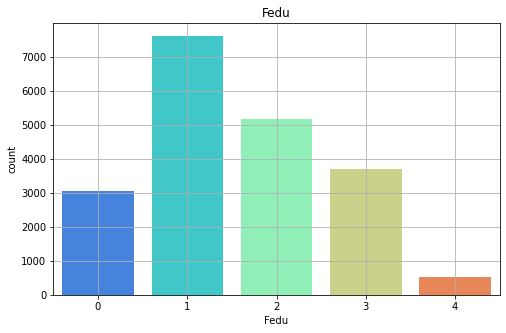

Mjob
2    7007
0    4441
3    4032
4    2309
1    2275
Name: Mjob, dtype: int64


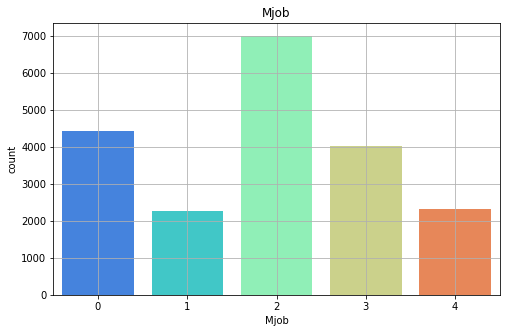

Fjob
2    8892
3    4100
4    2721
0    2400
1    1951
Name: Fjob, dtype: int64


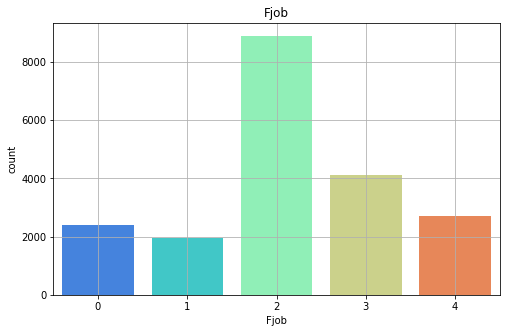

reason
0    8202
1    6318
3    3173
2    2371
Name: reason, dtype: int64


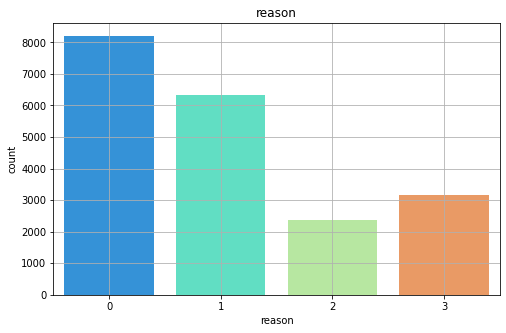

guardian
1    12584
0     4106
2     3374
Name: guardian, dtype: int64


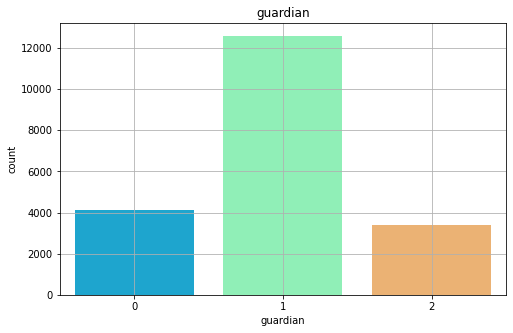

traveltime
1    10961
2     4655
3     2219
5      909
4      672
0      637
6       11
Name: traveltime, dtype: int64


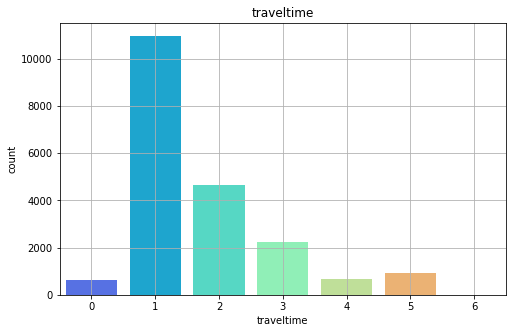

studytime
1    7913
2    6630
0    2579
3    2041
4     875
5      26
Name: studytime, dtype: int64


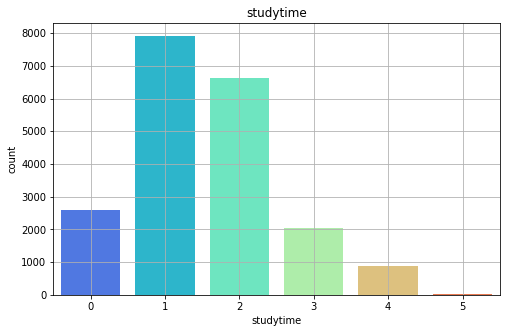

failures
0    18180
1     1205
2      545
3      130
4        4
Name: failures, dtype: int64


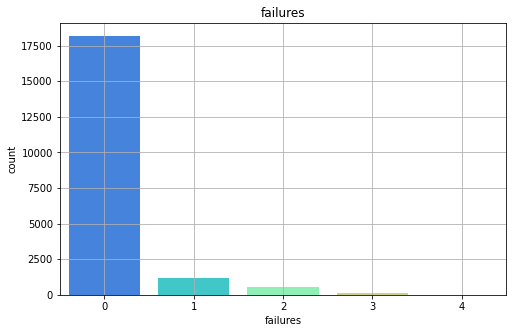

schoolsup
0    16903
1     3161
Name: schoolsup, dtype: int64


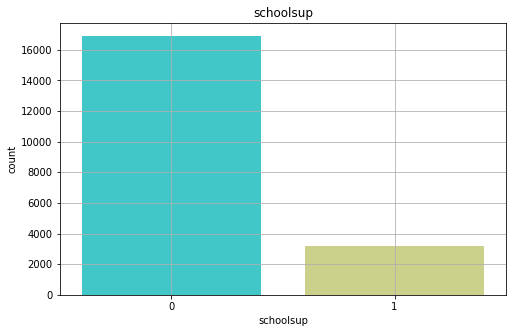

famsup
1    15116
0     4948
Name: famsup, dtype: int64


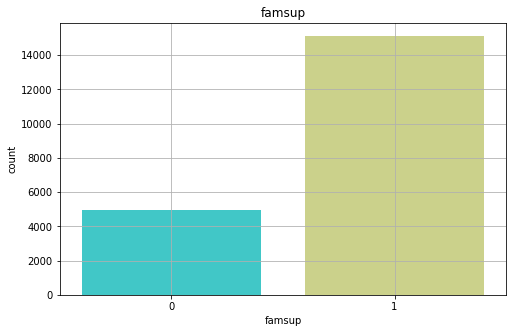

paid
0    15950
1     4114
Name: paid, dtype: int64


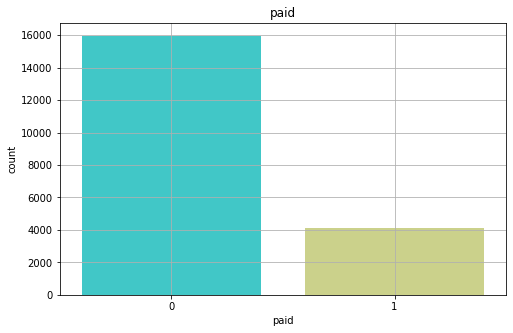

activities
0    10439
1     9625
Name: activities, dtype: int64


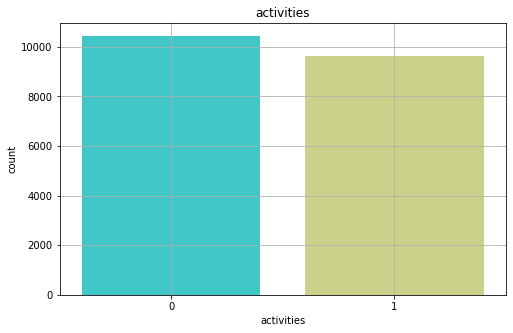

nursery
1    15963
0     4101
Name: nursery, dtype: int64


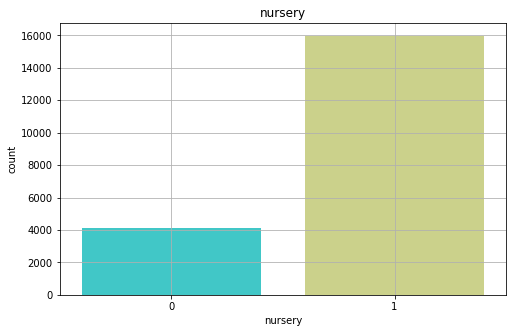

higher
1    16361
0     3703
Name: higher, dtype: int64


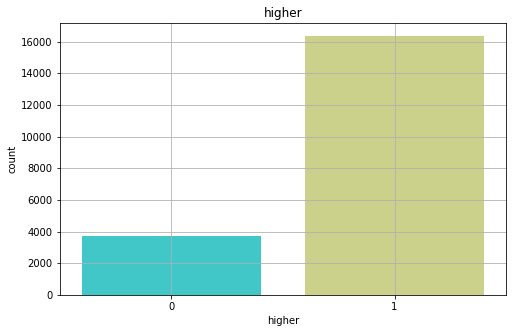

internet
1    16115
0     3949
Name: internet, dtype: int64


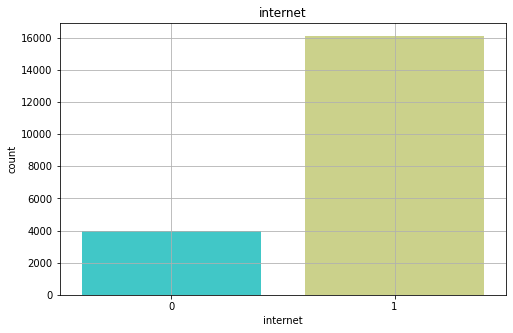

romantic
0    13018
1     7046
Name: romantic, dtype: int64


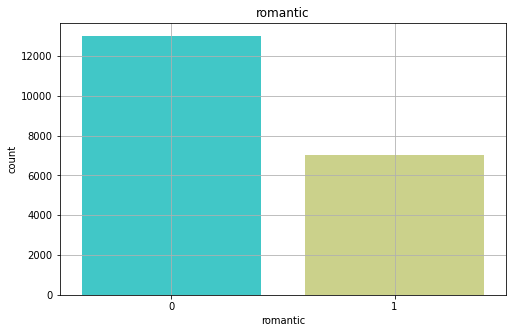

famrel
4    9821
5    5255
3    3802
2     923
1     233
0      30
Name: famrel, dtype: int64


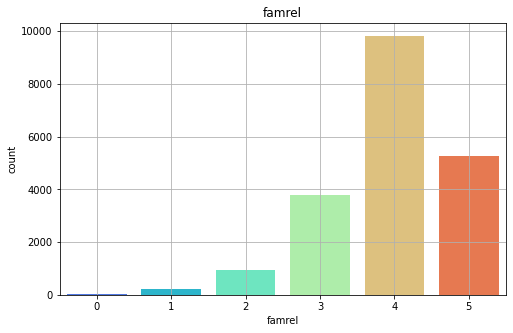

freetime
3    7495
4    4767
2    4425
1    1530
5    1053
0     794
Name: freetime, dtype: int64


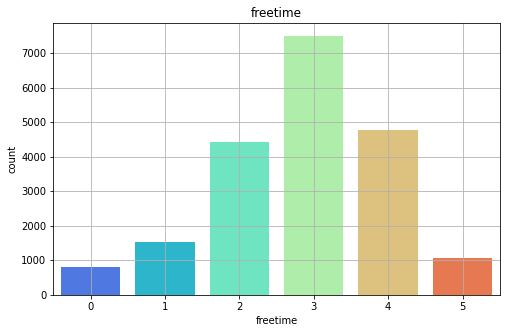

goout
2    6402
1    4906
4    3529
3    3238
0    1573
5     416
Name: goout, dtype: int64


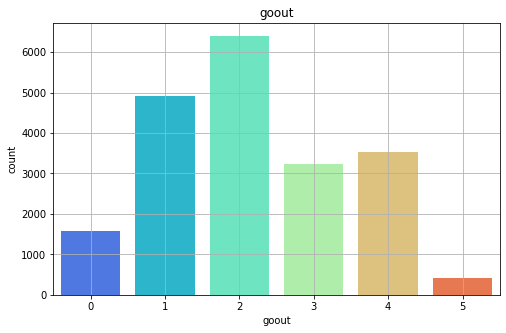

Dalc
1    11256
2     3503
3     1517
0     1149
5     1145
6      867
4      588
7       39
Name: Dalc, dtype: int64


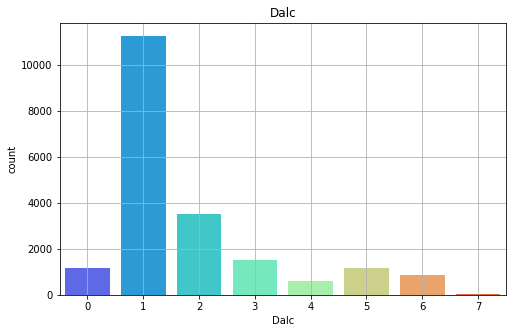

Walc
1    6656
2    5029
3    2533
0    2415
4    2337
5     964
6     130
Name: Walc, dtype: int64


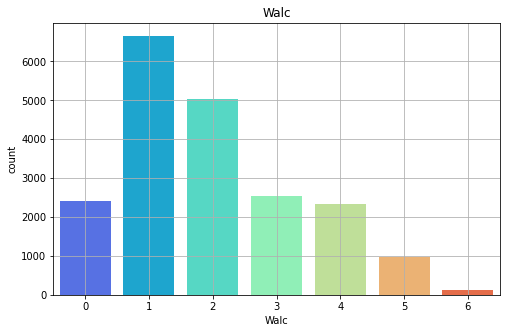

health
4    8807
3    3466
2    2693
1    2387
0    2026
5     685
Name: health, dtype: int64


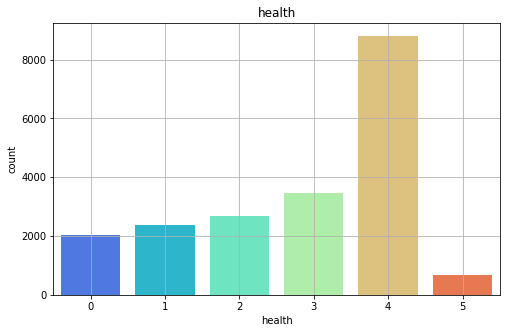

absences
0     9129
1     3016
2     2538
3     1843
4     1155
5      658
6      352
7      262
8      210
9      147
10     121
11     112
12      73
13      58
14      53
15      45
17      36
16      33
19      30
18      27
21      23
20      21
22      20
24      17
23      17
27      11
30      10
26       8
25       8
31       5
32       5
29       5
34       4
28       3
37       3
33       3
39       1
38       1
35       1
Name: absences, dtype: int64


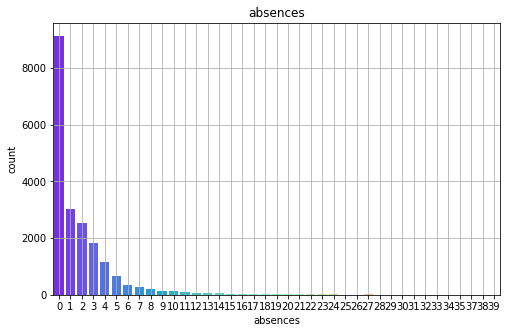

G1
14    2549
15    2464
13    2226
12    1924
16    1899
11    1544
17    1421
18    1323
10    1096
19    1041
9      781
20     540
8      511
7      325
6      172
21     104
5       75
4       32
3       14
22      13
2        7
0        2
1        1
Name: G1, dtype: int64


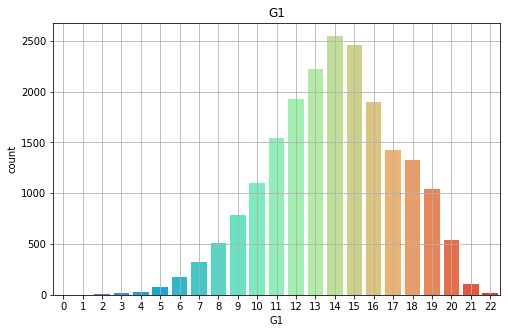

G2
12    2507
13    2375
11    2227
14    2224
10    1800
15    1722
9     1364
16    1196
8      963
17     839
7      625
18     610
19     387
6      343
20     204
5      195
0      102
4       90
3       88
2       74
1       64
21      63
22       2
Name: G2, dtype: int64


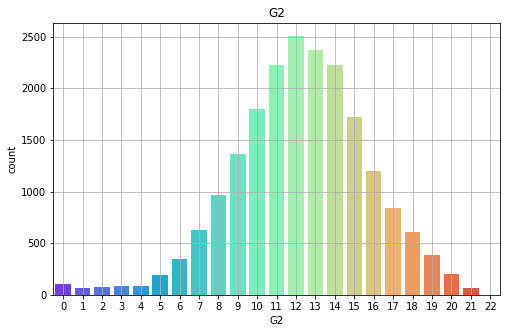

In [45]:
# Data Distribution 
for colm in data.select_dtypes(np.number).columns[:-1]:
    
    # get values of the caegorical features 
    var = data[colm]
    
    # count the number of unique values in each feature
    var_c = var.value_counts()
    
    # print the count of each classes
    print(f"{colm}\n{var_c}")
        
    plt.figure(figsize=(8,5))
    sns.countplot(x=colm ,data=data, palette='rainbow' )
    plt.title(colm)
    plt.grid()
    plt.show()

<p>
    The above plots show that the trainable parameters are highly biased towards one class. We must eliminate such features that will decrease the efficiency of making unbiased predictions. The Elimination criteria we have decided on here is; that if the minority class is less than 65% of the majority class, we drop the feature.<br>
    
The features that we will drop are:
    <ol>
        <li>Address</li>
        <li>Pstatus</li>
        <li>schoolsup</li>
        <li>guardian</li>
        <li>famsup</li>
        <li>paid</li>
        <li>nuresey</li>
        <li>higher</li>
        <li>internet</li>
        <li>failures</li>
        <li>absences</li>
    </ol>
</p>


In [46]:
features_to_drop = ["address","Pstatus","schoolsup","guardian",
                    "famsup","nursery","higher","internet","paid",
                   "failures","absences"]

# drop the features 
data.drop(labels= features_to_drop, axis= 1, inplace= True)

<p>
    Using the drop function we have dropt the more biased features. Now moving ahead let's analyse the class distribution of dependent variable
</p>
<hr>

9     10564
8      4857
10     1616
11     1133
7       746
13      456
14      310
6       229
12       80
5        47
18       19
17        5
16        2
Name: Grade, dtype: int64



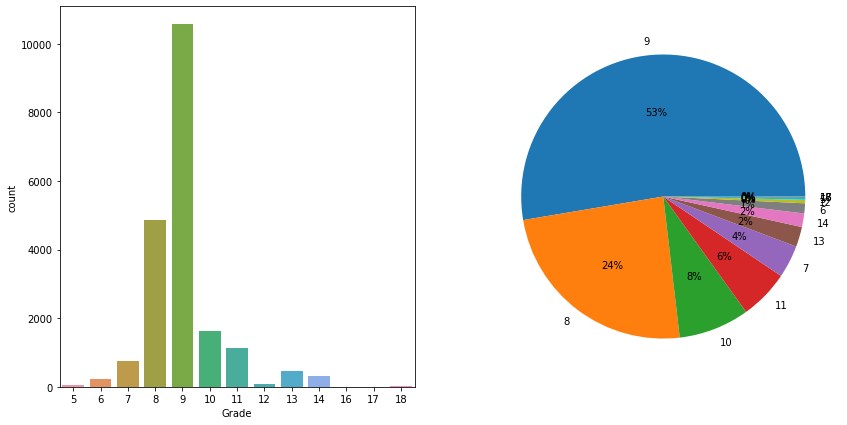

In [47]:
# Class distribution of Output/dependent feature


# prints the count of each class 
print( data['Grade'].value_counts() )
print()

plt.figure(figsize= (14, 7))
plt.subplot(1, 2, 1)
sns.countplot(x = 'Grade' , data = data)

plt.subplot(1, 2, 2)
plt.pie(data['Grade'].value_counts(), 
        labels= [ i for i in data['Grade'].value_counts().keys() ], autopct='%.0f%%')

plt.show()

<p>
    As you see here the number of data for the class 9 and 8 is very high. we will randomly selected and eliminate the record to reduce the biasness
</p>

In [48]:
threshold = 1100

# Randomly drop the records from the first two significant classes
for i in data['Grade'].value_counts().keys()[:4]:
    data.drop( index = random.sample( list(data[data['Grade'] == i].index.values),
                                    data['Grade'].value_counts()[i] - threshold), 
              axis = 0, inplace= True )

10    1100
11    1100
9     1100
8     1100
7      746
13     456
14     310
6      229
12      80
5       47
18      19
17       5
16       2
Name: Grade, dtype: int64



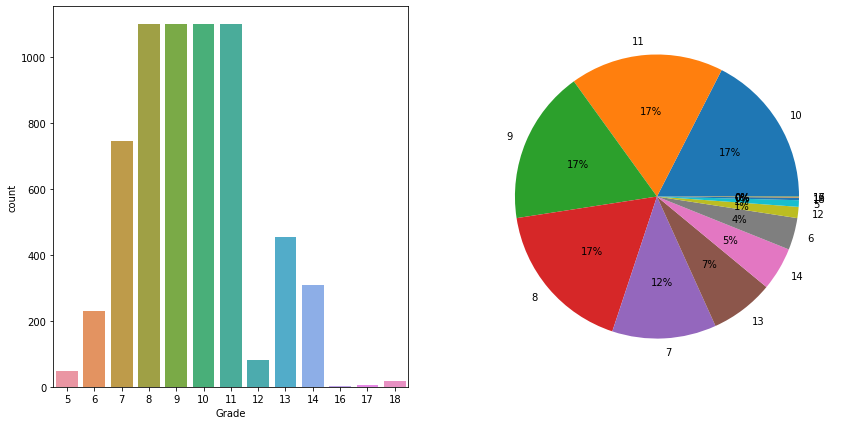

In [49]:
# Class distribution of Output/dependent feature

print( data['Grade'].value_counts() )
print()

plt.figure(figsize= (14, 7))

plt.subplot(1, 2, 1)
sns.countplot(x = 'Grade' , data = data)

plt.subplot(1, 2, 2)
plt.pie(data['Grade'].value_counts() , 
        labels= [ i for i in data['Grade'].value_counts().keys() ], 
        autopct='%.0f%%')

plt.show()

<p>
    As we see here even after randomly dropping the records we still have imbalance class, to over come this issue we will use SMOTE to generate our synthetic data   
</p>

5     1100
6     1100
7     1100
8     1100
9     1100
10    1100
11    1100
12    1100
13    1100
14    1100
16    1100
17    1100
18    1100
Name: Grade, dtype: int64



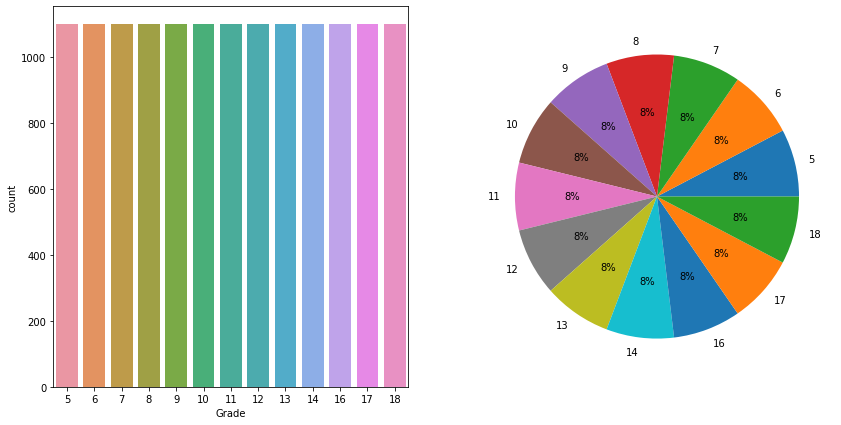

In [50]:

n_samples=int(1100)

def sampling_strategy(X,y,n_samples, t='majority'):
    target_classes = ''
    if t == 'majority':
        target_classes = y.value_counts() > n_samples
    elif t == 'minority':
        target_classes = y.value_counts() < n_samples
    tc = target_classes[target_classes == True].index
    #target_classes_all = y.value_counts().index
    sampling_strategy = {}
    for target in tc:
        sampling_strategy[target] = n_samples
    return sampling_strategy


# under sampling 
under_sampler = ClusterCentroids(
    sampling_strategy=sampling_strategy(data.iloc[:,:-1],data.iloc[:,-1],
                                        n_samples,t='majority'))

X_under, y_under = under_sampler.fit_resample(data.iloc[:,:-1],
                                              data.iloc[:,-1])

# over sampling
over_sampler = SMOTE(sampling_strategy=sampling_strategy(X_under, 
                                                         y_under, 
                                                         n_samples, 
                                                         t='minority'), 
                     k_neighbors=1)

X_bal, y_bal = over_sampler.fit_resample(X_under, y_under)


data = X_bal.copy()
data['Grade'] = y_bal

print( data['Grade'].value_counts() )
print()

plt.figure(figsize= (14, 7))

plt.subplot(1, 2, 1)
sns.countplot(x = 'Grade' , data = data)

plt.subplot(1, 2, 2)
plt.pie(data['Grade'].value_counts(), 
        labels= [ i for i in data['Grade'].value_counts().keys() ], 
        autopct='%.0f%%')

plt.show()



<hr>

In [51]:
# shuffle the data randomly
data = data.sample(n = data.shape[0])
data.head()

,school,sex,age,famsize,Medu,Fedu,Mjob,Fjob,reason,traveltime,...,romantic,famrel,freetime,goout,Dalc,Walc,health,G1,G2,Grade
6200,0,0,16,0,3,1,3,0,0,1,...,1,5,3,0,1,4,1,17,12,14
1173,0,1,14,0,3,2,2,4,1,2,...,0,4,4,2,1,1,3,13,13,8
7883,0,0,16,1,0,2,0,1,0,1,...,0,3,3,3,1,4,4,9,8,6
12841,0,1,16,0,2,0,1,0,2,1,...,1,4,3,2,1,0,4,12,14,17
2836,0,1,15,0,2,1,1,4,0,1,...,1,5,3,3,4,3,2,13,13,9


<hr>

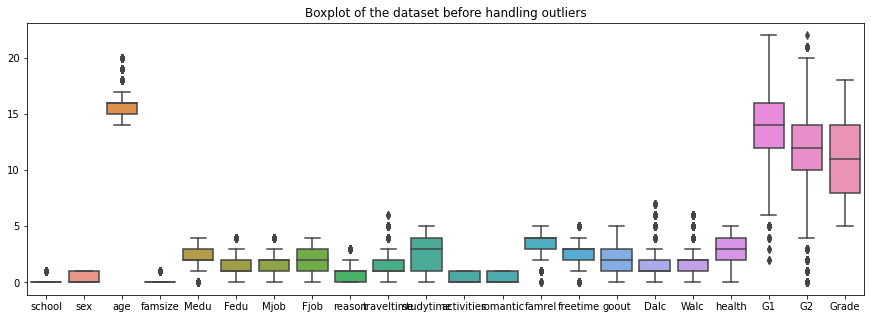

In [52]:
#outliers in the dataset

plt.figure(figsize=(15,5))
sns.boxplot(data=data)
plt.title('Boxplot of the dataset before handling outliers')
plt.show()

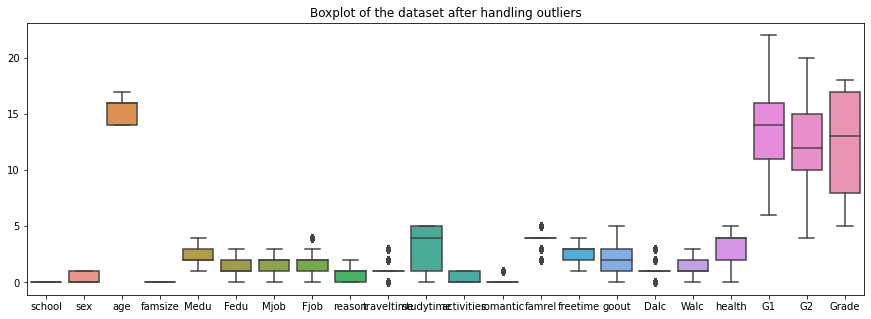

In [53]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

data = data[~((data < (Q1 - 1.5 * IQR))|(data > (Q3 + 1.5 * IQR))).any(axis=1)]

plt.figure(figsize=(15,5))
sns.boxplot(data=data)
plt.title('Boxplot of the dataset after handling outliers')
plt.show()

<hr>

In [54]:
# Feature Selection

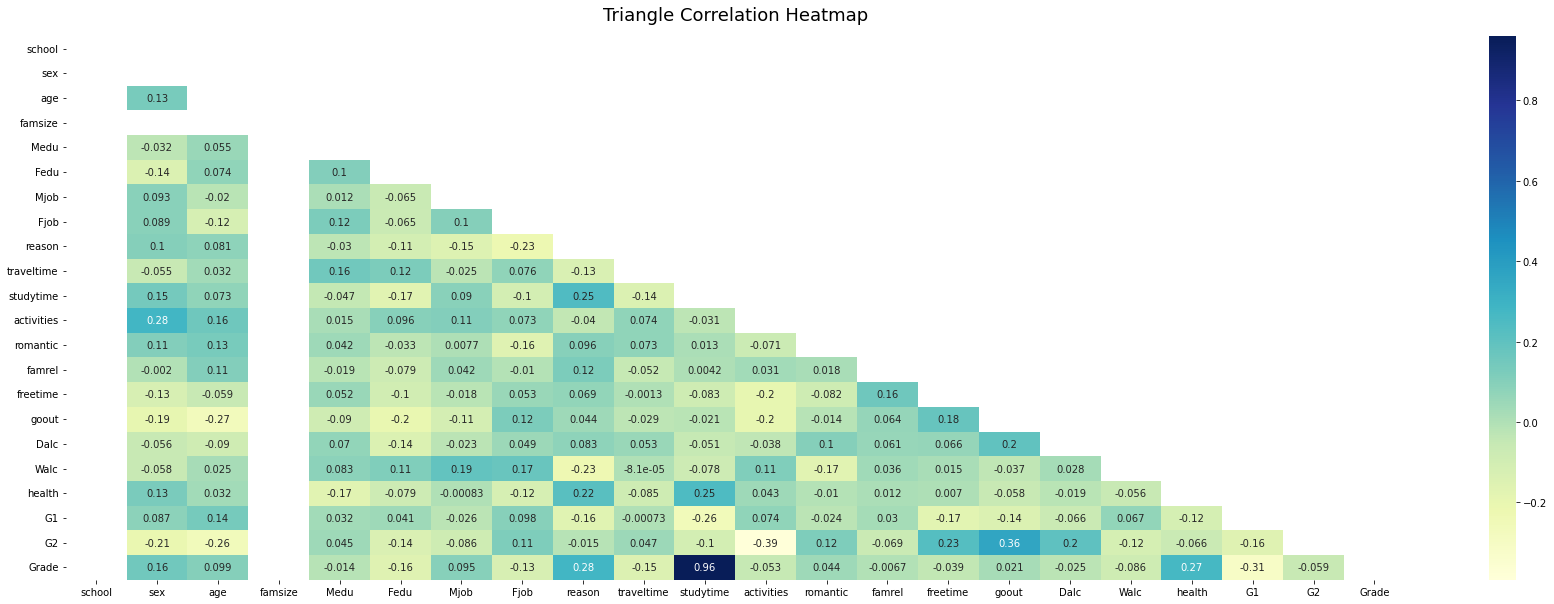

In [55]:
# Corelation Matrix

plt.figure(figsize = (30,10))

mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
heatmap = sns.heatmap(data.corr(), mask=mask, annot=True, cmap="YlGnBu")

heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [56]:
def variance(data):
    # Number of observations
    n = len(data)
    # Mean of the data

    mean = sum(data) / n

    # Square deviations

    deviations = [(x - mean) ** 2 for x in data]

    # Variance

    variance = sum(deviations) / n

    return variance

In [57]:
for i in data.columns[:-1]:
    print(f" {i} -> {variance(data[i].values)} ")

 school -> 0.0 
 sex -> 0.2252099615208265 
 age -> 1.1100555877088754 
 famsize -> 0.0 
 Medu -> 0.7216803962625247 
 Fedu -> 0.7526570651039544 
 Mjob -> 0.9184978589458026 
 Fjob -> 1.1300960357289567 
 reason -> 0.5357782923037528 
 traveltime -> 0.314095369771672 
 studytime -> 3.134929359799272 
 activities -> 0.22738479436736395 
 romantic -> 0.16597725314312198 
 famrel -> 0.4385744081724441 
 freetime -> 0.6241701815768561 
 goout -> 1.478057556243394 
 Dalc -> 0.4401301012512732 
 Walc -> 0.9319771775180287 
 health -> 1.7158688761799914 
 G1 -> 9.364135064800685 
 G2 -> 13.912164093756406 


In [58]:
for i in data.columns[:-1]:
    if variance(data[i].values) <= 0.5:
        data.drop(labels=[i], axis = 1, inplace= True)
        features_to_drop.append(i)

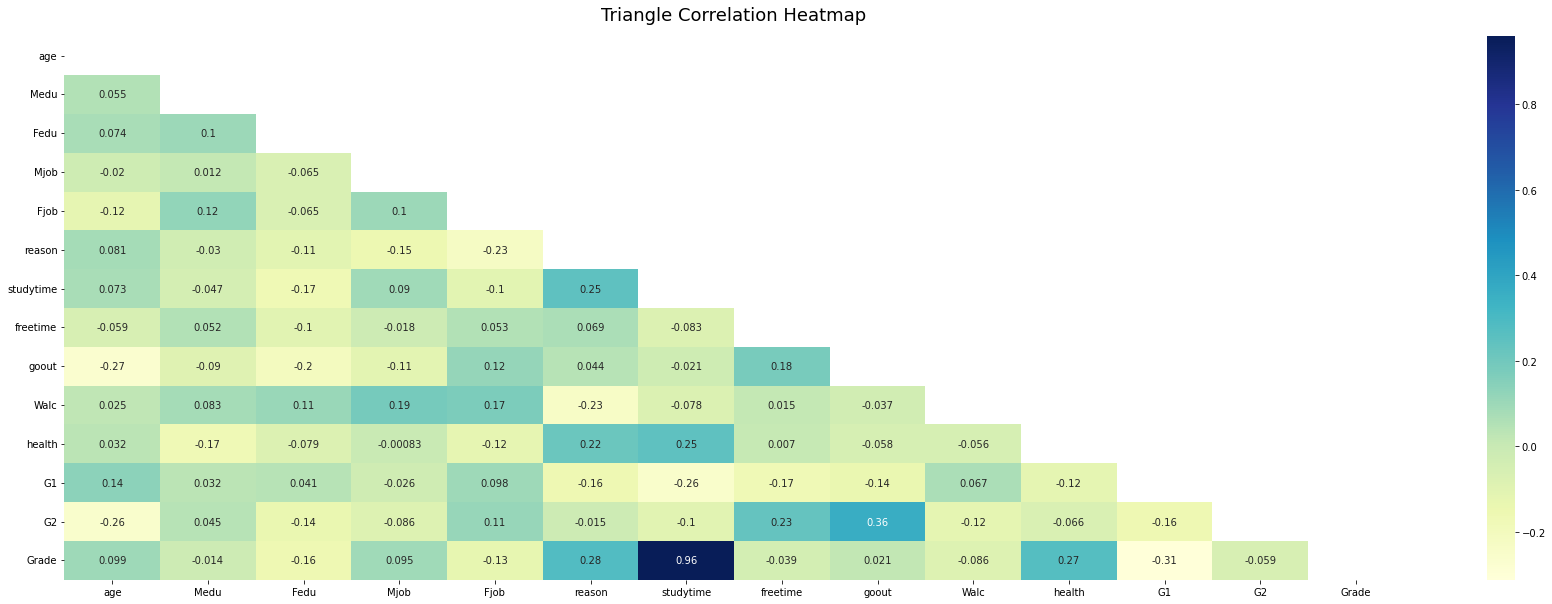

In [59]:
# Corelation Matrix

plt.figure(figsize = (30,10))

mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
heatmap = sns.heatmap(data.corr(), mask=mask, annot=True, cmap="YlGnBu")

heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

<hr>

In [60]:
# Feature Extraction

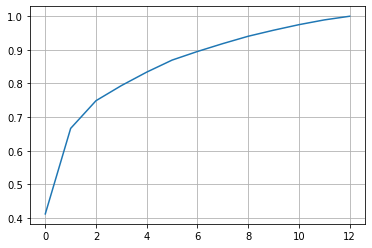

In [61]:


pca = PCA(n_components= None)
pca.fit_transform(data.iloc[:, :-1].values)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.show()

In [62]:
# cummuliative sum of varience 

np.cumsum(pca.explained_variance_ratio_)

array([0.411868  , 0.6663345 , 0.74877959, 0.79368144, 0.83380066,
       0.86956308, 0.89517891, 0.91860854, 0.94047971, 0.9584335 ,
       0.97493091, 0.98910031, 1.        ])

In [63]:
n = 6

pca = PCA(n_components= n)

most_valued_data_points = pca.fit_transform(data.iloc[:, :-1].values)


DATA = pd.DataFrame(data = most_valued_data_points , columns = [ f"PC-{i}" for i in range(n)] )

DATA['Grade'] = data.iloc[:, -1].values

data = DATA.copy()
DATA.head()

,PC-0,PC-1,PC-2,PC-3,PC-4,PC-5,Grade
0,-1.303339,0.312185,2.530621,0.150833,0.699952,-1.468659,8
1,-2.263051,-1.695153,-2.122237,-1.518990,-0.487172,1.623392,17
2,5.760248,4.862602,0.975440,-1.405917,0.712129,-0.306687,8
3,-2.263051,-1.695153,-2.122237,-1.518990,-0.487172,1.623392,17
4,-2.435653,-1.184242,-0.337884,-0.142061,-0.883574,3.006289,14


<hr>

In [64]:
# split the data 
X_train, X_test, y_train, y_test = train_test_split( data.iloc[:, :-1].values, data.iloc[:, -1].values, test_size=0.25)

In [65]:
# scaling and normalisation 

scalar = StandardScaler()

X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

<hr>

# Model Training and Analysis 

In [66]:
# Collection of fpr and tpr for various models 
ROC_Values = dict()

def classification_Report(model ,y_pred, model_name):
    """
    input  : object of the model, predicted
    output : returns various metrics to understand model performance 
    """
    
    # sklearns classification report function
    print( classification_report(y_test ,y_pred) )
    
    # Confusion matrix
    plt.figure(figsize= (15,15))
    cf_matrix = confusion_matrix(y_test, y_pred)
    hm = sns.heatmap((cf_matrix/np.sum(cf_matrix))*2 , annot=True, fmt='.2%', xticklabels=[ i for i in data.Grade.unique() ], yticklabels=[ i for i in data.Grade.unique() ])
    hm.set_xlabel("Predicted Values", fontsize = 15)
    hm.set_ylabel("Actual Values", fontsize = 15)
    plt.show()
    

In [67]:
def model_Trainer(model_obj, model_name):
    """
    input:
        model_obj  : object of our model 
        model_name : string input 
    returns:
        Generates predictions and classification report
        trained model
    """
    model_obj.fit(X_train, y_train)
    
    y_pred = model_obj.predict(X_test)

    classification_Report(model_obj, y_pred ,model_name)
    
    return model_obj

### 4.2 Machine Learning Approaches

              precision    recall  f1-score   support

           5       0.90      1.00      0.95       101
           6       0.80      0.87      0.83       120
           7       0.38      0.38      0.38        68
           8       0.18      0.15      0.16        53
           9       0.15      0.14      0.14        50
          10       0.26      0.20      0.23        50
          11       0.56      0.46      0.51        54
          12       0.92      0.97      0.94        90
          13       0.70      0.76      0.73        84
          14       0.84      0.81      0.83       118
          16       0.99      1.00      1.00       126
          17       1.00      1.00      1.00       230
          18       0.99      1.00      0.99        95

    accuracy                           0.79      1239
   macro avg       0.67      0.67      0.67      1239
weighted avg       0.78      0.79      0.78      1239



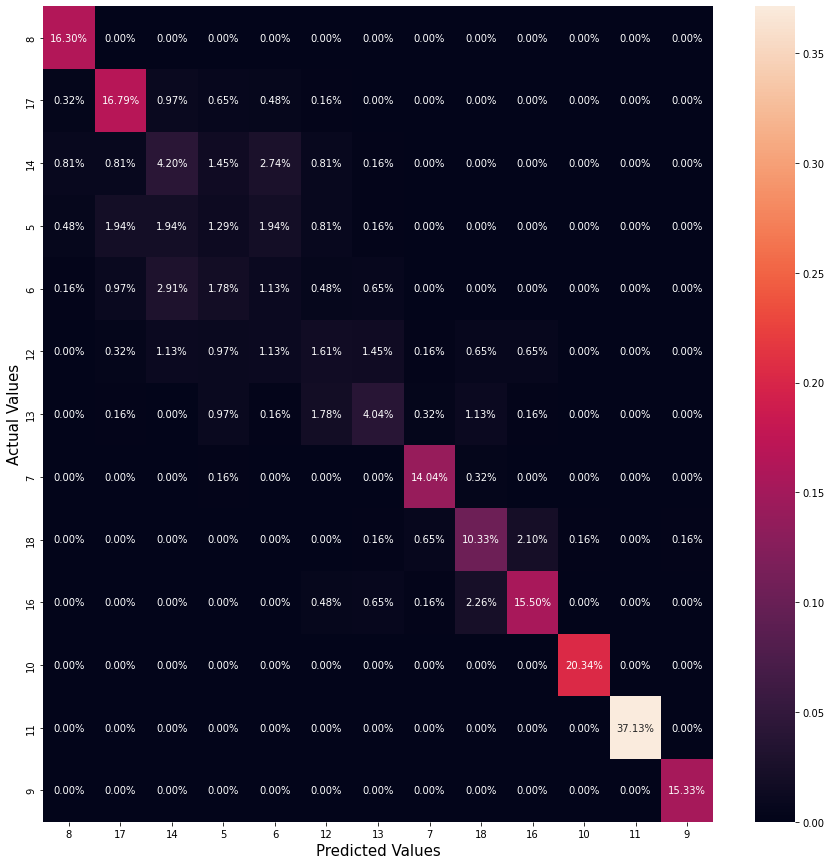

In [28]:
Decision_Tree = DecisionTreeClassifier()

Decision_Tree = model_Trainer(Decision_Tree , "Decision_Tree")

              precision    recall  f1-score   support

           5       0.93      1.00      0.96       101
           6       0.80      0.93      0.86       120
           7       0.49      0.53      0.51        68
           8       0.34      0.23      0.27        53
           9       0.32      0.22      0.26        50
          10       0.28      0.20      0.23        50
          11       0.43      0.37      0.40        54
          12       0.97      1.00      0.98        90
          13       0.77      0.77      0.77        84
          14       0.79      0.94      0.86       118
          16       1.00      1.00      1.00       126
          17       1.00      1.00      1.00       230
          18       1.00      0.99      0.99        95

    accuracy                           0.82      1239
   macro avg       0.70      0.71      0.70      1239
weighted avg       0.80      0.82      0.81      1239



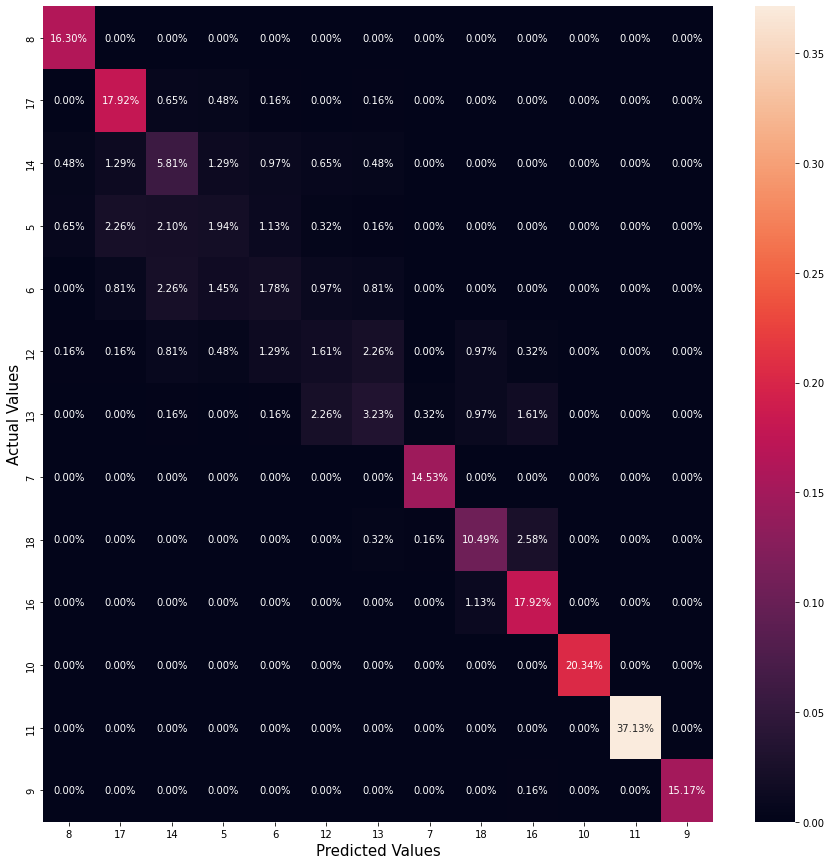

In [29]:
# Create a object of model
Random_Forest = RandomForestClassifier()

# Train the model and generate report
Decision_Tree_Tuned = model_Trainer(Random_Forest, "Random_Forest")

              precision    recall  f1-score   support

           5       0.68      0.96      0.80       101
           6       0.55      0.80      0.66       120
           7       0.57      0.19      0.29        68
           8       0.35      0.11      0.17        53
           9       0.35      0.12      0.18        50
          10       0.37      0.44      0.40        50
          11       0.60      0.61      0.61        54
          12       0.71      0.83      0.77        90
          13       0.61      0.40      0.49        84
          14       0.66      0.77      0.71       118
          16       1.00      1.00      1.00       126
          17       1.00      1.00      1.00       230
          18       0.99      1.00      0.99        95

    accuracy                           0.75      1239
   macro avg       0.65      0.63      0.62      1239
weighted avg       0.73      0.75      0.72      1239



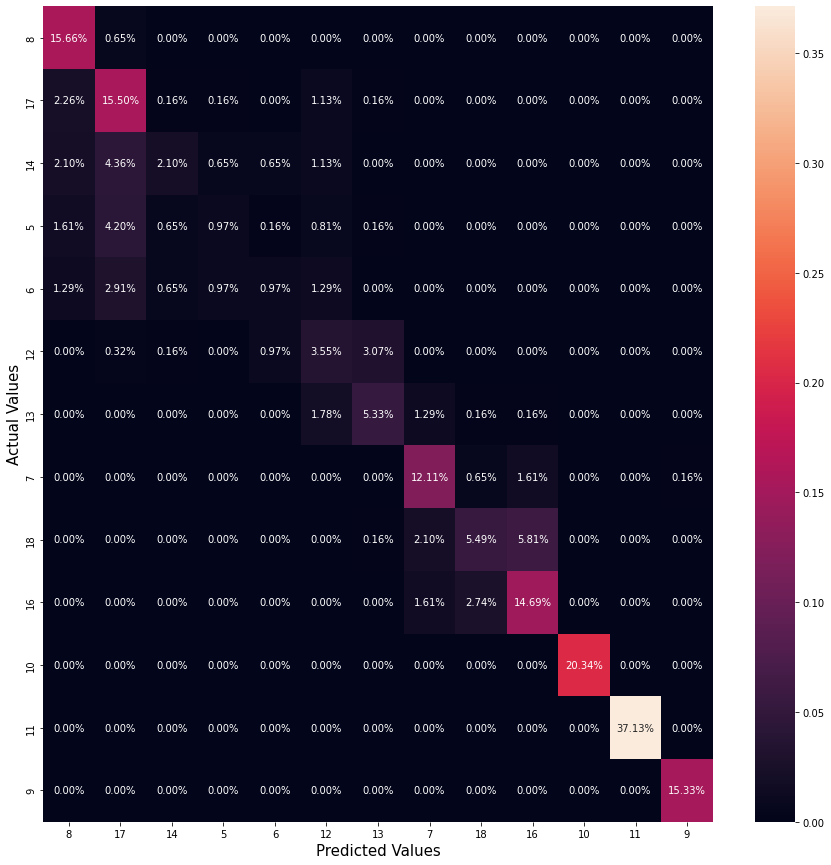

In [30]:
svm_classifier = SVC(probability=True)

# Train the model and generate report
svm_classifier = model_Trainer(svm_classifier, "svm_classifier")

              precision    recall  f1-score   support

           5       0.38      0.30      0.33       101
           6       0.23      0.76      0.35       120
           7       0.17      0.03      0.05        68
           8       0.00      0.00      0.00        53
           9       0.00      0.00      0.00        50
          10       0.00      0.00      0.00        50
          11       0.00      0.00      0.00        54
          12       0.00      0.00      0.00        90
          13       0.02      0.02      0.02        84
          14       0.00      0.00      0.00       118
          16       0.00      0.00      0.00       126
          17       0.38      1.00      0.55       230
          18       0.00      0.00      0.00        95

    accuracy                           0.29      1239
   macro avg       0.09      0.16      0.10      1239
weighted avg       0.13      0.29      0.17      1239



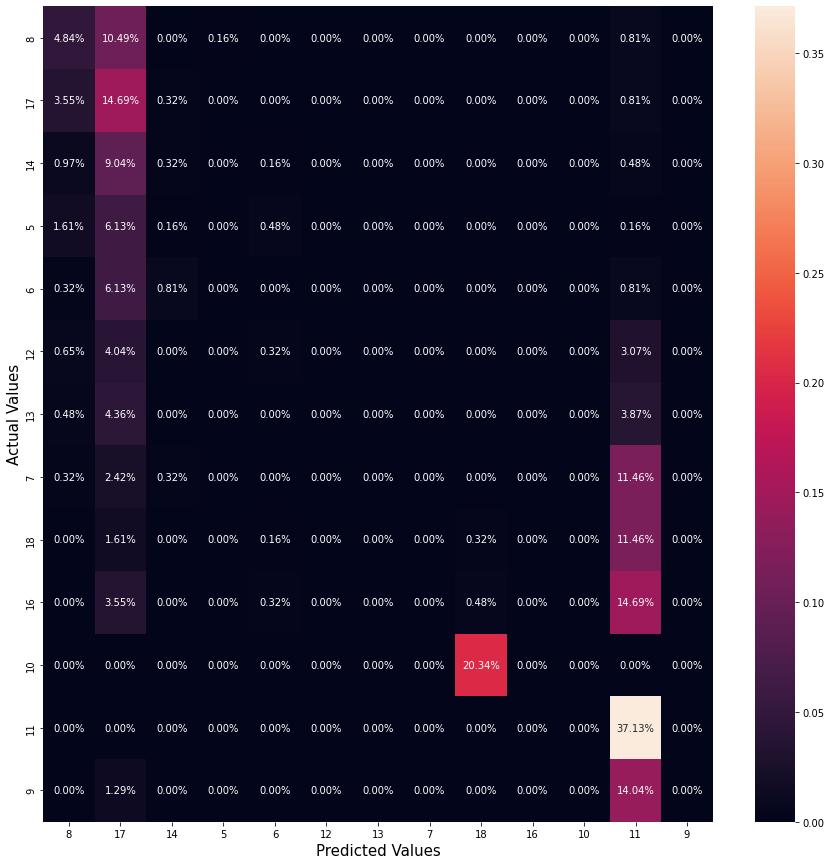

In [31]:
AdaBoost_Classifier = AdaBoostClassifier()

AdaBoost_Classifier = model_Trainer(AdaBoost_Classifier, "AdaBoost_Classifier")

### 4.3 deep Learning Approaches

In [32]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
from torch.nn import functional as F

In [33]:
# convrt the data to tensor

X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).type(torch.LongTensor).reshape(-1,1)
X_test  = torch.tensor(X_test).float()
y_test  = torch.tensor(y_test).type(torch.LongTensor).reshape(-1,1) 

In [97]:
# Convert the splitted data of tensors to TensorDataset
train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)

# From the tensordata set to mini batches 
train_data = DataLoader( train_data, 
                        batch_size= int(X_train.shape[0]/4),  # the data set will be devided into 4 equal mini batches
                       shuffle= True, 
                       drop_last= True)

test_data = DataLoader( test_data, shuffle= True )

In [104]:
# building ann classifier class 

class ANNClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        
        # input layer
        self.input = nn.Linear(X_train.shape[1], 16)
        
        # dense layers 
        self.dense_1 = nn.Linear(16, 32)
        self.dense_1_BN = nn.BatchNorm1d(32)
        
        self.dense_2 = nn.Linear(32, 64)
        self.dense_2_BN = nn.BatchNorm1d(64)
        
        self.dense_3 = nn.Linear(64, 128)
        self.dense_3_BN = nn.BatchNorm1d(128)
        
        self.dense_4 = nn.Linear(128, 64)
        self.dense_4_BN = nn.BatchNorm1d(64)
        
        self.dense_5 = nn.Linear(64, 64)
        self.dense_5_BN = nn.BatchNorm1d(64)
        
        # output layer
        self.output = nn.Linear(64,20)
        
    def forward(self,x):
        
        # input layer
        x = F.relu(self.input(x))
        # dense layer 1 
        x = self.dense_1(x)
        x = F.relu(self.dense_1_BN(x))
        
        
        
        # dense layer 2
        x = self.dense_2(x)
        x = F.relu(self.dense_2_BN(x))
       
        
        # dense layer 3 
        x = self.dense_3(x)
        x = F.relu(self.dense_3_BN(x))
        x = F.dropout(x, p = 0.5 , training= self.training )
        
        # dense layer 4 
        x = self.dense_4(x)
        x = F.relu(self.dense_4_BN(x))
        
       
        
        # dense layer 5 
        x = self.dense_5(x)
        x = F.relu(self.dense_5_BN(x))
    
        # output layer
        x = self.output(x) 
       
        
        return x

In [111]:
# create a instance of a class
model = ANNClassifier()

# loss function 
loss_fun = nn.CrossEntropyLoss()


# optimizer 
optimizer = torch.optim.Adam(model.parameters() , lr= 0.002)  # L2 regularization

In [112]:
def model_train_and_validation(model, epoch):
    
    train_acc = []
    test_acc = []
    
    train_loss = []
    test_loss = []
    # loop over every epoch
    for epochi in range(epoch):
        
        # loop over traing data batches
        bach_acc = []
        bach_loss = []
        for x,y in train_data: 
            
            # forward propogation
            yHat = model(x) 
            
            # loss 
            loss = loss_fun(yHat, torch.squeeze(y) )
            bach_loss.append(loss.detach().numpy())
            
            
            # back propogation 
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            
            # compute batch accuracy 
            bach_acc.append( accuracy_score(torch.argmax( yHat,dim =1) ,y) )
            
            
        # compute training accuracy and loss
        train_acc.append(np.mean(bach_acc))
        train_loss.append( np.mean(bach_loss) )
        
        # evaluation mode on
        model.eval()
        
        """
        x,y = next(iter( test_data ) )
        yHat = F.softmax(model(x), dim =1)
        """
        test_acc.append( accuracy_score( torch.argmax(  F.softmax( model(X_test)), dim =1), y_test) )
        test_loss.append( loss_fun( model(X_test), torch.squeeze(y_test) ).detach().numpy() )
        # model back to train mode
        model.train()
        
        print(f" Epoch : {epochi}, Train Acc : {train_acc[epochi]}, Train Loss : {train_loss[epochi]} ")
        
    model.eval()  
    return train_acc, train_loss, test_acc, test_loss

In [113]:
train_acc, train_loss, test_acc, test_loss = model_train_and_validation(model, 100)

 Epoch : 0, Train Acc : 0.1627155172413793, Train Loss : 2.8534679412841797 
 Epoch : 1, Train Acc : 0.29229525862068967, Train Loss : 2.57437801361084 
 Epoch : 2, Train Acc : 0.3701508620689655, Train Loss : 2.325711488723755 
 Epoch : 3, Train Acc : 0.3911637931034483, Train Loss : 2.139911651611328 
 Epoch : 4, Train Acc : 0.40167025862068967, Train Loss : 1.9937974214553833 
 Epoch : 5, Train Acc : 0.4210668103448276, Train Loss : 1.869194507598877 
 Epoch : 6, Train Acc : 0.4410021551724138, Train Loss : 1.7489030361175537 
 Epoch : 7, Train Acc : 0.4676724137931034, Train Loss : 1.6414549350738525 
 Epoch : 8, Train Acc : 0.49568965517241376, Train Loss : 1.545506238937378 
 Epoch : 9, Train Acc : 0.4991918103448276, Train Loss : 1.4635924100875854 
 Epoch : 10, Train Acc : 0.5105064655172413, Train Loss : 1.399962067604065 
 Epoch : 11, Train Acc : 0.5193965517241379, Train Loss : 1.335844874382019 
 Epoch : 12, Train Acc : 0.5274784482758621, Train Loss : 1.2960923910140991 
 

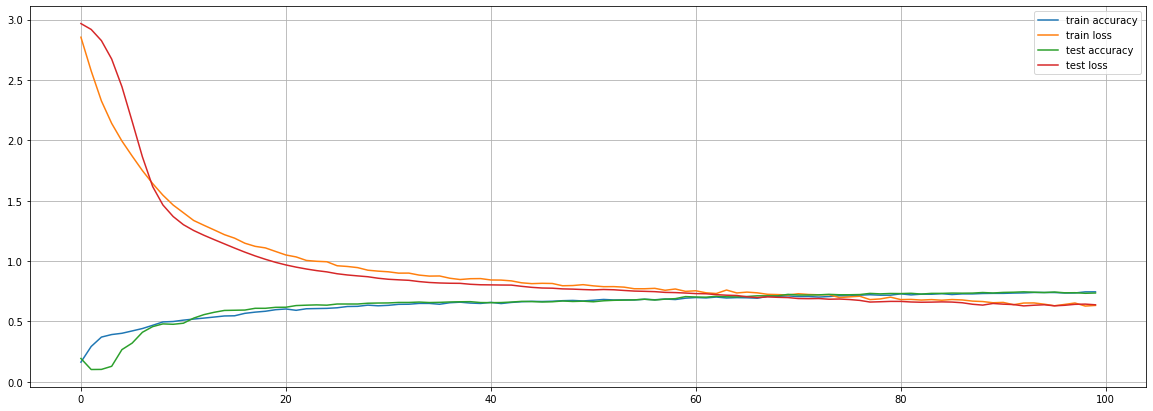

In [114]:
plt.figure(figsize= (20,7))

plt.plot(train_acc, label = "train accuracy")
plt.plot( train_loss, label = "train loss" )
plt.plot( test_acc, label = "test accuracy" )
plt.plot( test_loss, label = "test loss" )
plt.legend()
plt.grid()
plt.show()

In [115]:
train_accuracy = accuracy_score( torch.argmax( model(X_train), dim =1), y_train) 
test_accuracy = accuracy_score( torch.argmax( F.softmax(model(X_test)), dim =1), y_test) 

print(f"The Traing accuaracy is {train_accuracy} \nThe Test accuracy is {test_accuracy}  ")

The Traing accuaracy is 0.77092866756393 
The Test accuracy is 0.735270379338176  


# Generate Predictions 

In [139]:
# Load the test data points 

df = pd.read_csv("cs98x-22-dl-task2/test.csv")
Id = df.iloc[:, 0].values.astype(np.int32)

# feature selection
df.drop( labels= features_to_drop , axis= 1, inplace= True )
df.drop( labels= ['id'] , axis= 1, inplace= True )
df = df.dropna()

df.head()

,age,Medu,Fedu,Mjob,Fjob,reason,studytime,freetime,goout,Walc,health,G1,G2
0,16,3,1,health,other,home,1,5,3,1,4,9,12
1,15,4,4,other,other,home,1,3,3,1,4,14,9
2,19,3,1,health,at_home,home,1,3,2,4,4,11,13
3,14,1,0,services,other,course,2,0,2,1,2,13,11
4,14,3,1,at_home,at_home,home,1,2,0,2,4,12,13


In [140]:
# Label Encode the Values

for i in df.select_dtypes(np.object).columns:
    
    df[i] = la_dct[i].transform(df[i].values)
    
df.head()

,age,Medu,Fedu,Mjob,Fjob,reason,studytime,freetime,goout,Walc,health,G1,G2
0,16,3,1,1,2,1,1,5,3,1,4,9,12
1,15,4,4,2,2,1,1,3,3,1,4,14,9
2,19,3,1,1,0,1,1,3,2,4,4,11,13
3,14,1,0,3,2,0,2,0,2,1,2,13,11
4,14,3,1,0,0,1,1,2,0,2,4,12,13


In [141]:
# Feature Extraction

n = 6
most_valued_data_points = pca.transform(df.iloc[:, :].values)
df = pd.DataFrame(data = most_valued_data_points , columns = [ f"PC-{i}" for i in range(n)] )

df.head()

,PC-0,PC-1,PC-2,PC-3,PC-4,PC-5
0,2.130903,-3.292305,3.336759,0.503223,-1.182524,1.617489
1,-1.834126,0.994241,2.657250,0.400230,-0.805781,1.636160
2,2.157812,-1.069020,1.887065,3.865356,-0.636767,0.884739
3,0.202260,0.415362,1.882906,-0.905785,0.808932,-0.740901
4,2.180038,-0.218803,1.937636,2.292662,-1.297696,0.898256


In [142]:
# Store the results in the dataFrame
res = pd.DataFrame()
res['id'] = Id

# scale the data 
df = scalar.transform(df.values)

# convert to tensor
df =  torch.tensor(df).float()


res['grade'] =  pd.DataFrame( torch.argmax(model(df),axis = 1) )
res = res.dropna()
# Save the csv file with name as "results" and file extention ".csv"
res.to_csv( 'neural_network_1.csv' , index = False)

In [144]:
torch.argmax( F.softmax(model(df)), axis =1)

tensor([ 6,  6,  6, 10,  6, 10,  6,  6, 14, 10,  6,  6, 10,  6, 10, 13, 10,  6,
        11,  9, 10,  6, 10, 11,  6,  6,  9, 10,  5,  6,  6,  6, 14, 10,  9,  6,
         6,  6,  6,  6,  6,  6, 10,  6, 11,  6, 11,  6, 11,  6,  6,  6, 11,  6,
        11,  6,  6,  6, 11,  6,  6, 10, 11,  6,  6,  6,  6,  6,  6, 10,  6,  6,
         6,  9, 11,  6,  6,  7,  6, 10,  7,  6,  6,  6,  6, 13,  6,  7,  9,  6,
         6, 10, 13,  6,  6,  6, 10,  7,  6, 14,  6])